In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import tensorflow as tf
import datetime
import os

In [4]:
# MNISTProject sınıfını tanımlayın
# Tekrar kullanılabilirlik sağladığı için class kullanıldı
class MNISTProject: 
    def __init__(self):
        self.X_train = None # Eğitim için kullanılacak görüntü verileri
        self.X_test = None  #Test için kullanılacak görüntü verileri
        self.y_train = None # Eğitim verilerinin doğru etiketleri
        self.y_test = None  #Test verilerinin doğru etiketleri
        self.INPUT_SHAPE = (28, 28, 1) # Resimlerin boyutunu belirler. MNIST resimleri 28x28 pikseldir ve siyah-beyazdır (1 kanal)
        self.NUM_CLASSES = 10 # Toplam sınıf sayısıdır. MNIST için rakamlar 0’dan 9’a kadar olduğundan, 10 sınıf var

    def load_and_prepare_data(self):
        """Veri setini yükle ve hazırla"""
        # Veriyi yükle
        (self.X_train, self.y_train), (self.X_test, self.y_test) = keras.datasets.mnist.load_data()
        
        # Veriyi normalize et( 0-1 arasına ölçeklendir)
        self.X_train = self.X_train.astype('float32') / 255.0
        self.X_test = self.X_test.astype('float32') / 255.0
        
        # Reshape işlemi
        self.X_train = self.X_train.reshape(-1, *self.INPUT_SHAPE) # her resmi (28, 28, 1) boyutuna getiriyoruz
        self.X_test = self.X_test.reshape(-1, *self.INPUT_SHAPE)
        
        # One-hot encoding: modelin rakamları daha iyi anlamasını sağlar Rakam "3" ise: [0, 0, 0, 1, 0, 0, 0, 0, 0, 0].
        self.y_train = keras.utils.to_categorical(self.y_train, self.NUM_CLASSES)
        self.y_test = keras.utils.to_categorical(self.y_test, self.NUM_CLASSES)
        
        print("Veri seti hazırlandı:")
        print(f"X_train shape: {self.X_train.shape}")
        print(f"X_test shape: {self.X_test.shape}")

# Sınıfın bir örneğini oluştu
mnist = MNISTProject()

# Metodu çağırın
mnist.load_and_prepare_data()


Veri seti hazırlandı:
X_train shape: (60000, 28, 28, 1)
X_test shape: (10000, 28, 28, 1)


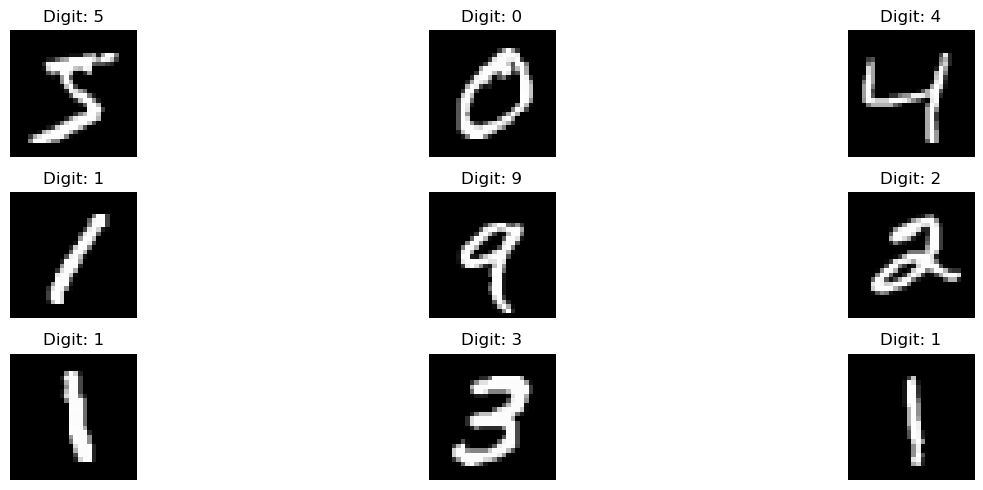

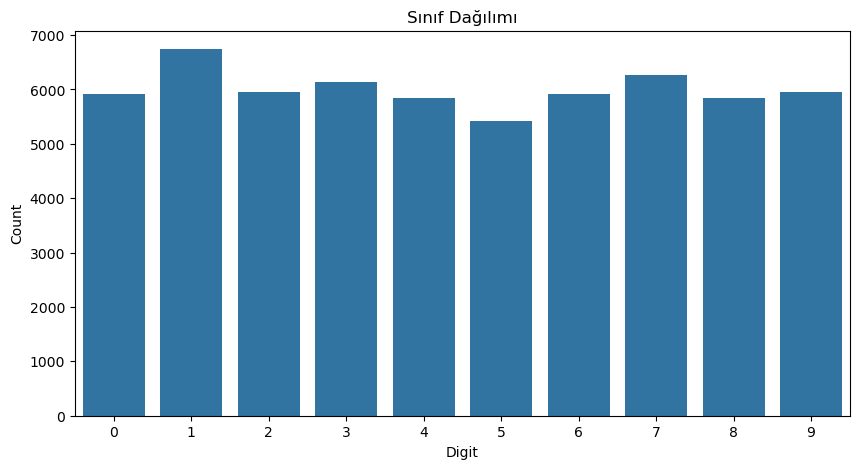

In [6]:
def analyze_data(self):
        """Veri seti analizi ve görselleştirme"""
        plt.figure(figsize=(15, 5))
        
        # Örnek görüntüler
        for i in range(9):
            plt.subplot(3, 3, i + 1)
            plt.imshow(self.X_train[i].reshape(28, 28), cmap='gray')
            plt.title(f'Digit: {np.argmax(self.y_train[i])}')
            plt.axis('off')
        plt.tight_layout()
        plt.show()
        
        # Sınıf dağılımı
        plt.figure(figsize=(10, 5))
        sns.countplot(x=np.argmax(self.y_train, axis=1))
        plt.title('Sınıf Dağılımı')
        plt.xlabel('Digit')
        plt.ylabel('Count')
        plt.show()
MNISTProject.analyze_data = analyze_data
mnist.analyze_data()


In [8]:
def create_model(self, model_type='complex'):  # Daha fazla katman ve özellik içerir
        """Model oluşturma"""
        if model_type == 'simple':  #Daha az katman içerir, hızlı çalışır, ancak doğruluk oranı daha düşüktür.
            self.model = keras.Sequential([
                Input(shape=self.INPUT_SHAPE),  # Modelin giriş boyutunu tanımlar
                layers.Conv2D(32, (3, 3), activation='relu'),
                layers.MaxPooling2D((2, 2)),
                layers.Flatten(),
                layers.Dense(128, activation='relu'),
                layers.Dense(self.NUM_CLASSES, activation='softmax')
            ])
        else:
            self.model = keras.Sequential([
                # Convolutional layers
                layers.Conv2D(32, (3, 3), activation='relu', input_shape=self.INPUT_SHAPE),
                layers.BatchNormalization(),
                layers.Conv2D(32, (3, 3), activation='relu'),
                layers.BatchNormalization(),
                layers.MaxPooling2D((2, 2)),
                layers.Dropout(0.25),
                
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.BatchNormalization(),
                layers.Conv2D(64, (3, 3), activation='relu'),
                layers.BatchNormalization(),
                layers.MaxPooling2D((2, 2)),
                layers.Dropout(0.25),
                
                # Dense layers
                layers.Flatten(),
                layers.Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
                layers.BatchNormalization(),
                layers.Dropout(0.5),
                layers.Dense(self.NUM_CLASSES, activation='softmax')
            ])
            
        """MODEL DERLENMESİ"""
    
        self.model.compile(
            optimizer='adam',
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        self.model.summary()

MNISTProject.create_model= create_model
mnist.create_model(model_type='complex') #complex model türünde bir model oluşturuldu.


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 10, 10, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 10, 10, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 597,738 (2.28 MB)

 Trainable params: 596,330 (2.27 MB)

 Non-trainable params: 1,408 (5.50 KB)

In [10]:
def create_callbacks(self):
        """Callback fonksiyonları oluştur"""
        checkpoint_path = "model_checkpoints/model_{epoch:02d}_{val_accuracy:.4f}.keras"
        os.makedirs(os.path.dirname(checkpoint_path), exist_ok=True)
        
        callbacks = [
            EarlyStopping(
                monitor='val_loss',
                patience=5,
                restore_best_weights=True
            ),
            ModelCheckpoint(
                filepath=checkpoint_path,
                save_best_only=True,
                monitor='val_accuracy',
                mode='max'
            ),
            ReduceLROnPlateau(
                monitor='val_loss',
                factor=0.2,
                patience=3,
                min_lr=1e-6
            )
        ]
        return callbacks

MNISTProject.create_callbacks= create_callbacks


In [12]:
def train_model(self, epochs=20, batch_size=128):
        """Model eğitimi"""
        callbacks = self.create_callbacks() #eğitimde kullanılacak callback ler çağırılır
        
        self.history = self.model.fit( # kerasın fit fonksiyonu eğitim  yapar
            self.X_train, # eğitim verisi
            self.y_train, #eğitim etiketi
            epochs=epochs,
            batch_size=batch_size,
            validation_split=0.2,
            callbacks=callbacks,
            verbose=1
        )
MNISTProject.train_model= train_model
mnist.train_model(epochs=5, batch_size=128)  


Epoch 1/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 74ms/step - accuracy: 0.8641 - loss: 4.3767 - val_accuracy: 0.4462 - val_loss: 1.8791 - learning_rate: 0.0010
Epoch 2/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 30s 80ms/step - accuracy: 0.9707 - loss: 0.3479 - val_accuracy: 0.9831 - val_loss: 0.2546 - learning_rate: 0.0010
Epoch 3/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.9775 - loss: 0.2538 - val_accuracy: 0.9857 - val_loss: 0.2248 - learning_rate: 0.0010
Epoch 4/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 84ms/step - accuracy: 0.9780 - loss: 0.2349 - val_accuracy: 0.9850 - val_loss: 0.1968 - learning_rate: 0.0010
Epoch 5/5
375/375 ━━━━━━━━━━━━━━━━━━━━ 31s 82ms/step - accuracy: 0.9816 - loss: 0.2059 - val_accuracy: 0.9873 - val_loss: 0.2019 - learning_rate: 0.0010


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9845 - loss: 0.1948

Test accuracy: 0.9863


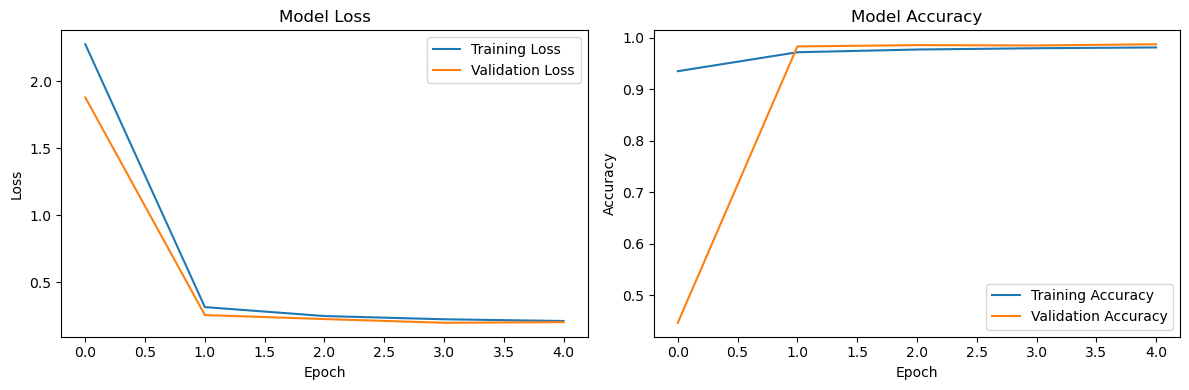

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


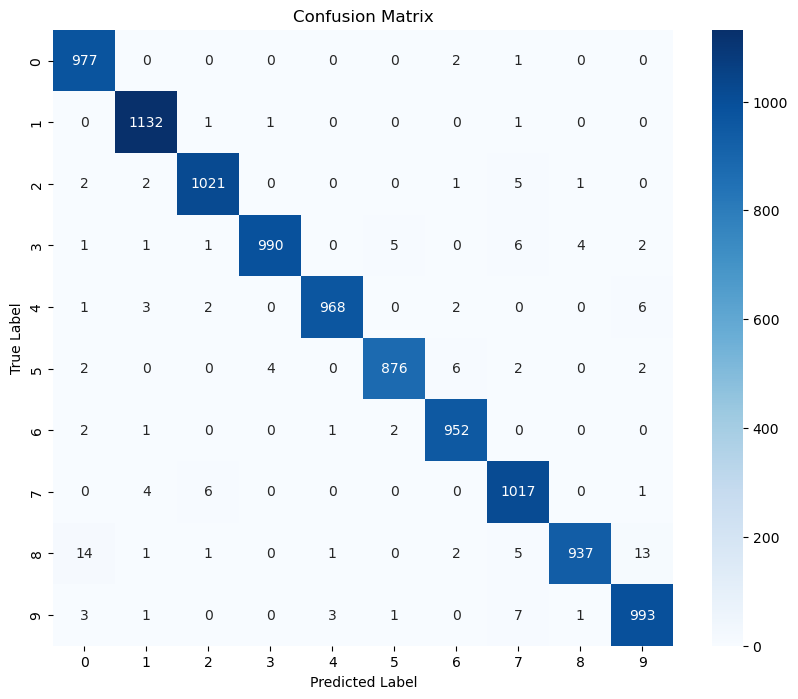


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.99      0.98      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.99       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.98      0.98      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [14]:
def evaluate_model(self):
        """Model değerlendirme ve görselleştirme"""
        # Test seti üzerinde değerlendirme
        test_loss, test_accuracy = self.model.evaluate(self.X_test, self.y_test)
        print(f"\nTest accuracy: {test_accuracy:.4f}")
        
        # Eğitim geçmişi görselleştirme
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.plot(self.history.history['loss'], label='Training Loss')
        plt.plot(self.history.history['val_loss'], label='Validation Loss')
        plt.title('Model Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(self.history.history['accuracy'], label='Training Accuracy')
        plt.plot(self.history.history['val_accuracy'], label='Validation Accuracy')
        plt.title('Model Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()
        
        plt.tight_layout()
        plt.show()
        
        # Confusion Matrix
        y_pred = self.model.predict(self.X_test)
        y_pred_classes = np.argmax(y_pred, axis=1)
        y_true_classes = np.argmax(self.y_test, axis=1)
        
        cm = confusion_matrix(y_true_classes, y_pred_classes)
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title('Confusion Matrix')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.show()
        
        # Classification Report
        print("\nClassification Report:")
        print(classification_report(y_true_classes, y_pred_classes))

MNISTProject.evaluate_model= evaluate_model
mnist.evaluate_model()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


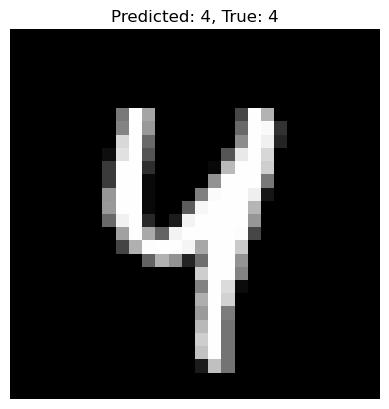

Prediction probabilities:
Digit 0: 0.0000
Digit 1: 0.0001
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.9999
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


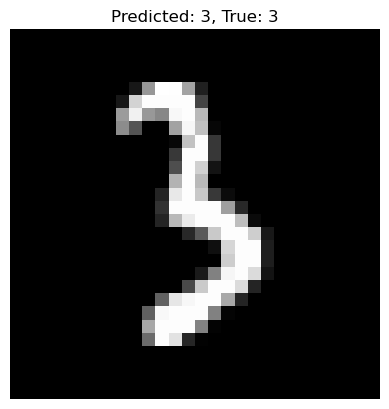

Prediction probabilities:
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0001
Digit 3: 0.9992
Digit 4: 0.0000
Digit 5: 0.0005
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0001
Digit 9: 0.0001


In [16]:
def predict_single_image(self, image_idx):
        """Tek bir görüntü için tahmin"""
        image = self.X_test[image_idx:image_idx+1]
        prediction = self.model.predict(image)
        predicted_class = np.argmax(prediction)
        true_class = np.argmax(self.y_test[image_idx])
        
        plt.imshow(image.reshape(28, 28), cmap='gray')
        plt.title(f'Predicted: {predicted_class}, True: {true_class}')
        plt.axis('off')
        plt.show()
        
        print(f"Prediction probabilities:")
        for i, prob in enumerate(prediction[0]):
            print(f"Digit {i}: {prob:.4f}")
            
MNISTProject.predict_single_image= predict_single_image
mnist.predict_single_image(image_idx=42)
mnist.predict_single_image(image_idx=44)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


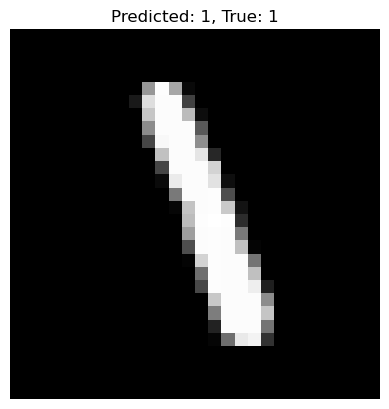

Prediction probabilities:
Digit 0: 0.0000
Digit 1: 0.9999
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


In [18]:
mnist.predict_single_image(image_idx=46)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


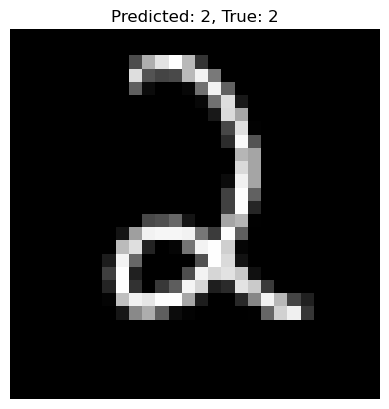

Prediction probabilities:
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 1.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


In [20]:
mnist.predict_single_image(image_idx=47)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


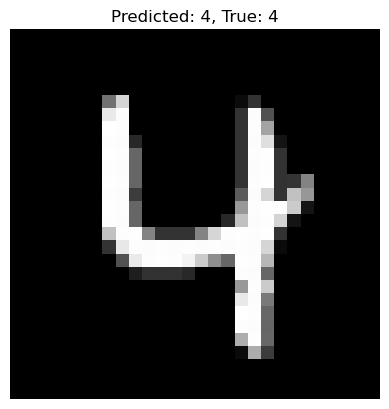

Prediction probabilities:
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 1.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


In [22]:
mnist.predict_single_image(image_idx=49)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


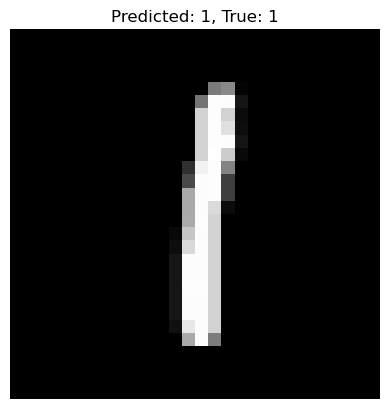

Prediction probabilities:
Digit 0: 0.0000
Digit 1: 1.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


In [24]:
mnist.predict_single_image(image_idx=178)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


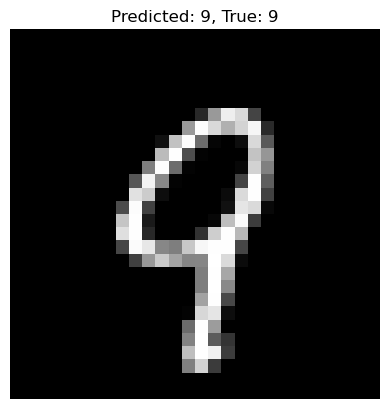

Prediction probabilities:
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.0013
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0001
Digit 8: 0.0000
Digit 9: 0.9985


In [33]:
mnist.predict_single_image(image_idx=118)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step


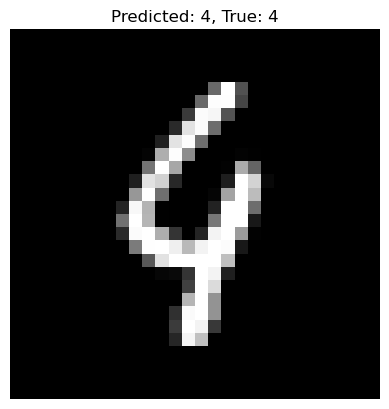

Prediction probabilities:
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.0000
Digit 4: 0.9969
Digit 5: 0.0000
Digit 6: 0.0001
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0031


In [35]:
mnist.predict_single_image(image_idx=115)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


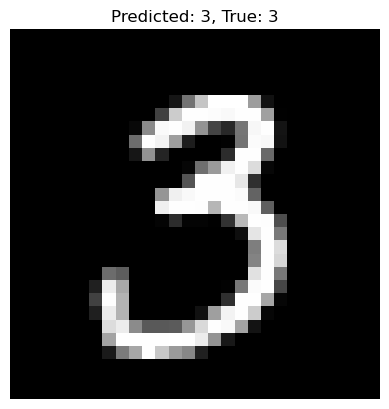

Prediction probabilities:
Digit 0: 0.0000
Digit 1: 0.0000
Digit 2: 0.0000
Digit 3: 0.9999
Digit 4: 0.0000
Digit 5: 0.0000
Digit 6: 0.0000
Digit 7: 0.0000
Digit 8: 0.0000
Digit 9: 0.0000


In [37]:
mnist.predict_single_image(image_idx=90)